# Добрый день!

### В данной работе я рассмотрел данные о клиентах банка и попытался выявить отрицательные закономерности. а также пути решения в преодолении банковского клиентооттока.

In [133]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data['Exited'] = churn_data['Exited'].replace({0: 'Stayed', 1: 'Left'})
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,Left
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,Stayed
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,Left
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,Stayed
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,Stayed


Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

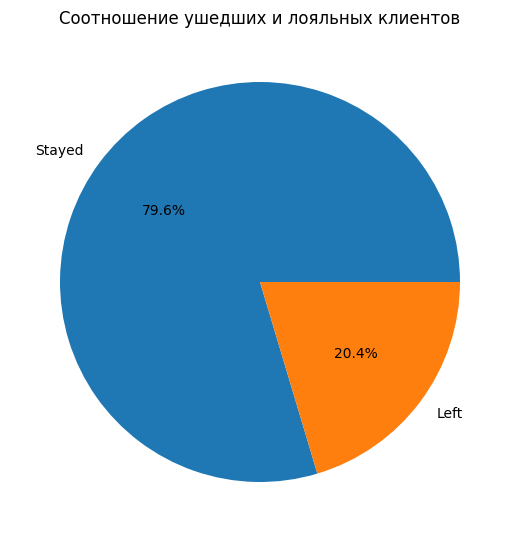

In [134]:
import matplotlib.pyplot as plt
plt.style.use('default')
exited_clients = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited_clients,
    labels=exited_clients.index,
    autopct='%.1f%%'
);
axes.set_title('Соотношение ушедших и лояльных клиентов') 

Из данной диаграммы мы можем заметить, что банк потерял каждого пятого клиента. Конечно, это не является критичным показателем, однако необходима работа по выявлению системности ухода клиентов и поиска решений по снижению процента ухода.

Text(0.5, 1.0, 'Распределение баланса клиентов банка (баланс от $2500)')

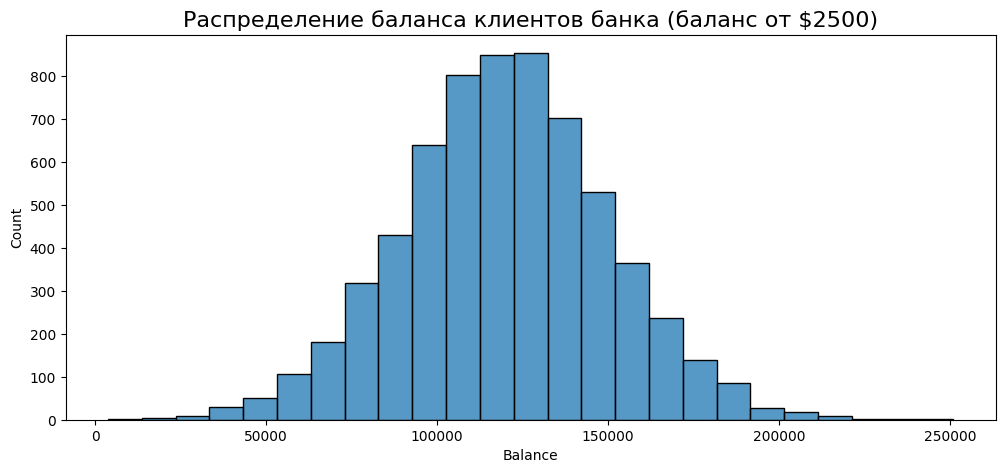

In [135]:
import seaborn as sns
balance_mask = churn_data['Balance'] > 2500
fig = plt.figure(figsize=(12,5))
hist = sns.histplot(
    data=churn_data[balance_mask],
    x='Balance',
    bins=25,
);
hist.set_title('Распределение баланса клиентов банка (баланс от $2500)', fontsize=16)

Из гистограммы можно заметить, что большинство клиетов банка являются людьми среднего европейского достатка и хранят на своих счетах от $100000 до $150000 долларов США, что примерно сопостовимо среднегодовому доходу в тех странах, где банк ведёт свою деятельность.

Text(0.5, 1.0, 'Распределение баланса клиентов банка по показателю ухода')

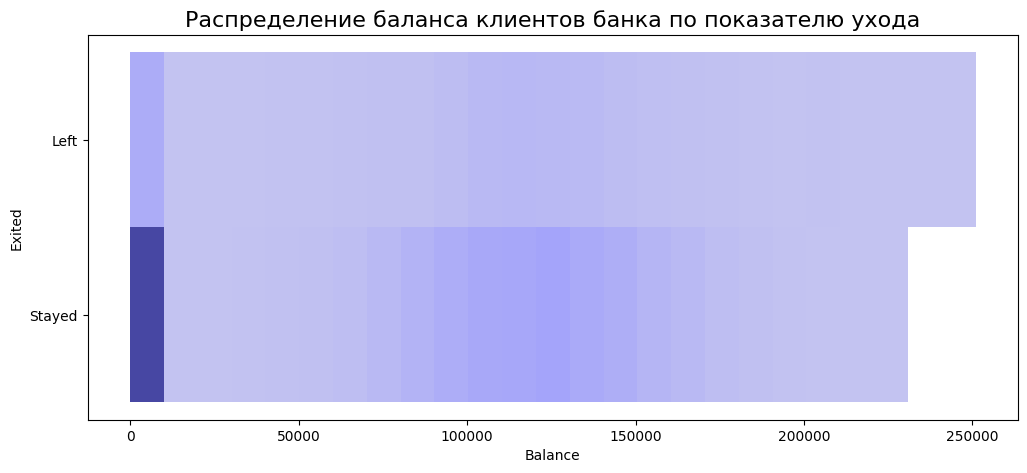

In [136]:
fig = plt.figure(figsize=(12,5))
hist = sns.histplot(
    data=churn_data,
    x='Balance',
    y='Exited',
    bins=25,
    color='blue',
);
hist.set_title('Распределение баланса клиентов банка по показателю ухода', fontsize=16)

В целом распределение ушедших и оставшихся клиентов пропорционально одинаковое, однако я заметил тот факт, что в группе самых состоятельных клиентов, большинство составляют ушедшие, следовательно можно посоветовать банку подумать о специальных бонусах для держателей больших(от $200000) сумм на счетах(к примеру, бесплатные бизнес-залы в аэропортах)

Text(0.5, 1.0, 'Возрастное распределение ушедших клиентов')

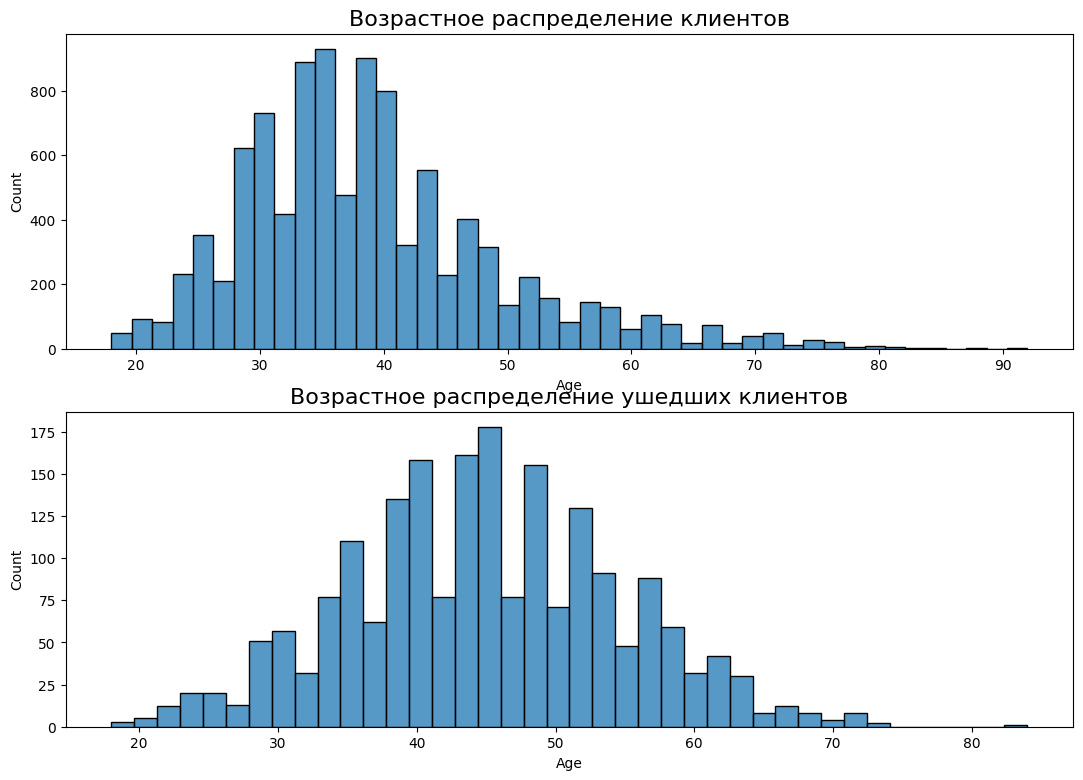

In [137]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 9))
hist = sns.histplot(
    data=churn_data,
    x='Age',
    bins=45,
    ax=axes[0]
);
hist.set_title('Возрастное распределение клиентов', fontsize=16)
left_cl = churn_data['Exited'] == 'Left'
hist2 = sns.histplot(
    data=churn_data[left_cl],
    x='Age',
    bins=40,
    ax=axes[1]
);
hist2.set_title('Возрастное распределение ушедших клиентов', fontsize=16)


Я специально построил две гистограммы, чтобы показать, что основная масса клиентов банка находится в возрастной группе от 30 до 40 лет и в этой группе отток относительно не велик. Проблема же заключается в том, что большинство ушедших клиентов находятся в возрастной группе от 40 до 50 лет(которая не является самой многочиленной в общем количестве). Следовательно банку необходимо обратить внимание на эту группу (как вариант, более выгодные условия для пенсионных вкладов или низкие проценты по кредитам на высшее образование (для детей данных клиентов)).

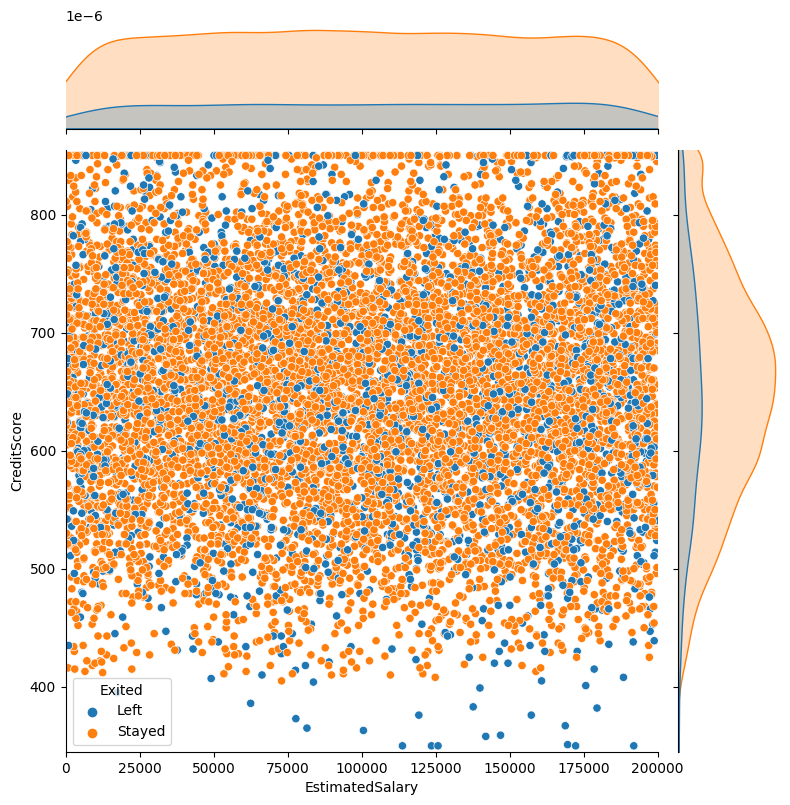

In [138]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    xlim = (0, 200000),
    ylim = (345, 855),
    height=8,
)

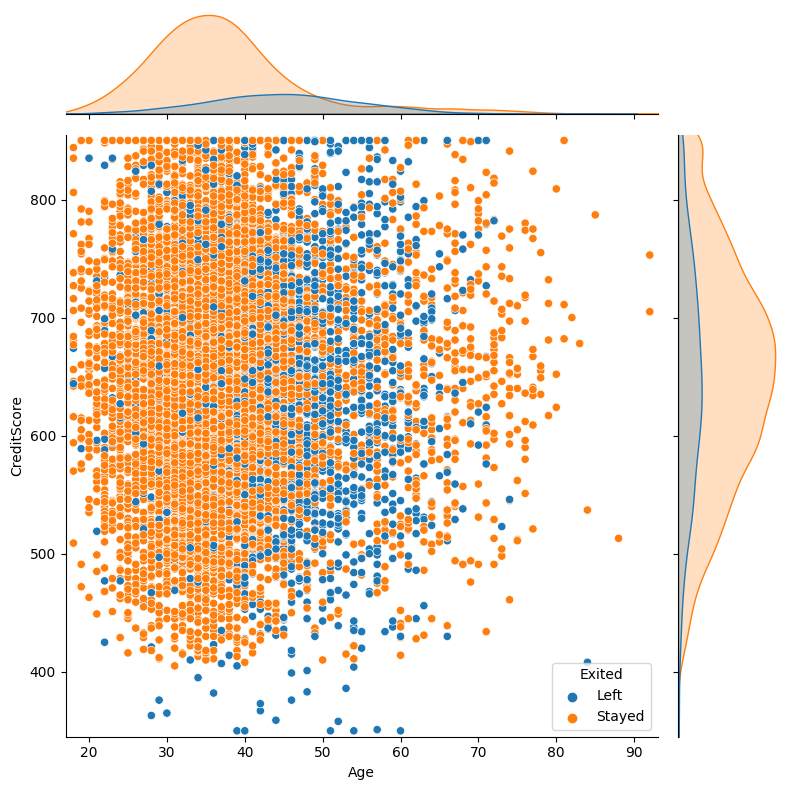

In [139]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='Age', 
    y='CreditScore',
    hue='Exited',
    xlim = (17, 93),
    ylim = (345, 855),
    height=8,
)

Из-за сильного разброса в первой диаграмме очень трудно уловить какую-либо зависимость. Да, среди клиентов с низким кредитным рейтингом в основном ушедшие клиенты, но, как по мне, это вполне нормально. Я бы, единственное, обратил внимание на то, что среди клиентов с высокими зарплатами есть немало клиентов с низким кредитным рейтингом. Если кредитный рейтинг сильно влияет на возможности данных клиентов, есть смысл пересмотреть их кредитный рейтинг.
Объясню свою точку зрения касаемо крединтного рейтинга: я построил ещё одну диаграмму зависимости возраста и кредитного рейтинга, где обнаружил, что у некоторых молодых клиентов(18-25 лет) кредитный рейтинг максимален или близок к нему, что на мой взгляд странно, потому что изначально кредитный рейтинг должен быть минимален. Возможно это вполне нормально, однако я бы обратил на это внимание.

Text(0.5, 1.0, 'Влияние Пола Клиента на Отток')

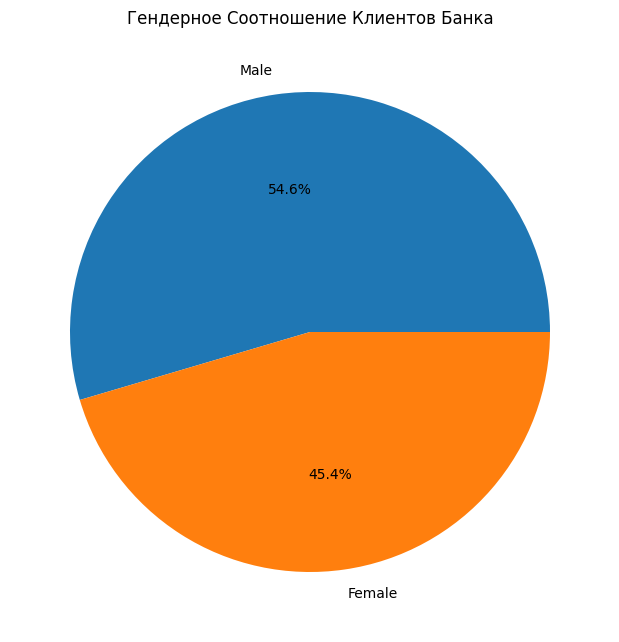

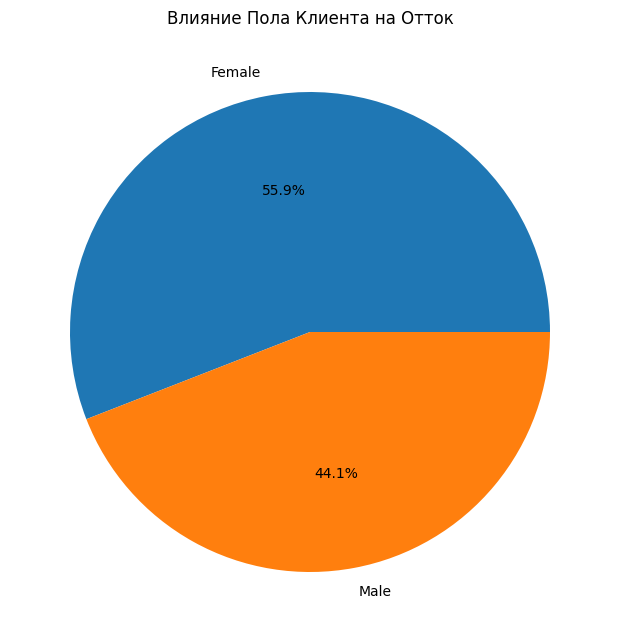

In [140]:
left_cl = churn_data['Exited'] == 'Left'
gender = churn_data['Gender'].value_counts()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender,
    labels=gender.index,
    autopct='%.1f%%'
);
axes.set_title('Гендерное Соотношение Клиентов Банка') 
gender2 = churn_data[left_cl]['Gender'].value_counts()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender2,
    labels=gender2.index,
    autopct='%.1f%%'
);
axes.set_title('Влияние Пола Клиента на Отток') 

Из диаграмм наглядно видно, что при том, что женская половина является меньшей из общего количества клиентов, их отток значительно выше мужского. Следовательно, банку необходимо обратить внимание на эту проблему(как вариант, выпустить отдельную карту специально для девушек с повышенным кэшбеком на оплату определённых товаров и услуг)

In [147]:
import plotly
import plotly.express as px
bar_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    barmode='group',
    height=400,
    width=1000,
    title='Зависимость Оттока Клиентов от Приобретённых y Банка Услуг'
)
fig.show()

Диаграмма достаточно неоднозначна. С одной стороны отчётливо видно, что большинство ушедших клиентов имели не более одной услуги. В этом есть недоработка отдела продаж. По всей видимости, клиенты не видели для себя каких-либо преимуществ в данном банке. С другой стороны, среди клиентов, имевших более трёх услуг не осталось ни одного. Это уже вопрос к качеству предоставления банковских услуг.

Text(0.5, 1.0, 'Влияние Активности Клиента на Отток')

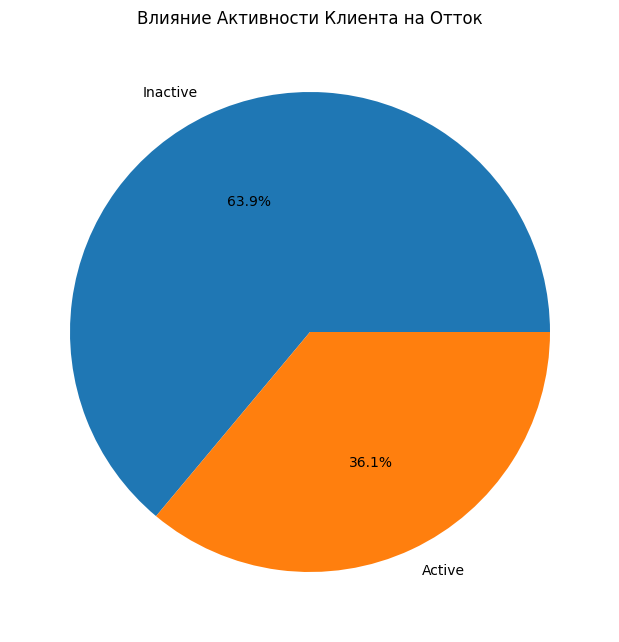

In [150]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].replace({0: 'Inactive', 1: 'Active'})
left_cl = churn_data['Exited'] == 'Left'
gender = churn_data[left_cl]['IsActiveMember'].value_counts()
fig = plt.figure(figsize=(6, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    gender,
    labels=gender.index,
    autopct='%.1f%%'
);
axes.set_title('Влияние Активности Клиента на Отток') 

Из данной диаграммы мы можем увидеть, что две трети ушедших клиентов были неактивными. Я бы посоветовал банку наладить сотрудничество с популярными местами развлечений(к примеру, торговыми центрами), чтобы к примеру при оплате банковской картой нашего банка в данном торговом центре, клиенту шёл кэшбек, скидка или прочие бонусы.

In [188]:
churn_data['Left'] = churn_data['Exited'] == 'Left'
churn_data['Left'] = churn_data['Left'].replace({False: 0, True: 1})

In [187]:
choropleth_data = churn_data.groupby('Geography')['Left'].mean()
fig = px.choropleth(
    data_frame=choropleth_data,
    locations=choropleth_data.index,
    locationmode = 'country names',
    color='Left',
    range_color=[0, 0.4], 
    title='Отток Клиентов в Долях от Общего Числа по Странам', 
    width=1100, 
    height=700, 
    color_continuous_scale='Reds'
)

fig.show()

Согласно данной карте, мы можем определть, что банк имеет высокий отток на немецком рынке. Это может быть связано как с национальными признаками(разные правила ведения бизнеса в данной стране и т.п.), так и непосредственно с банковскими(недоработка управляющего персонала и т.п.). Я бы посоветовал провести более глубокий анализ работы компании на немецком рынке(в том числе и по результатам клииентского опроса) по выявлению причин высокого оттока клиентов.

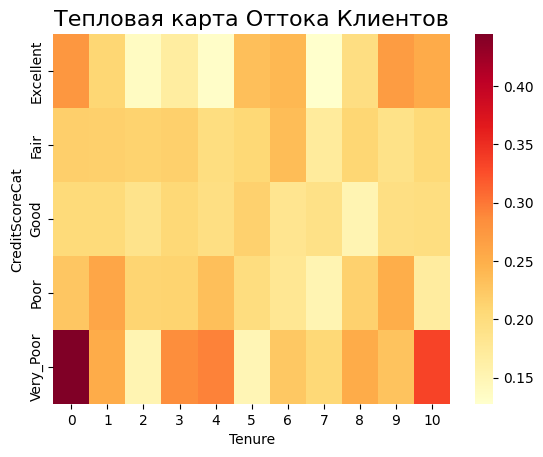

In [206]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
    values='Left',
    index='CreditScoreCat',
    columns='Tenure',
    fill_value=0
)

heatmap = sns.heatmap(
    data=pivot, 
    cmap='YlOrRd'
)
heatmap.set_title('Тепловая карта Оттока Клиентов', fontsize=16);


На основе тепловой карты можно выделить две серьёзные группы. К первой группе я бы отнёс новых клиентов с низким кредитным рейтингом. Там всё предельно ясно: недоработки касаются организации бонусов для новых клиентов, которые начали пользоваться услугами банка, но при этом не увидели для себя реальных перспектив и преимуществ. Ко второй группе я бы отнёс людей также с низким кредитным рейтингом, но долгой историей. Что касается этой группы, то здесь всё гораздо сложнее. С одной стороны, следует разработать дополнительные бонусы для клиентов с высоким стажем. С другой стороны, как я уже говорил выше, необходимо пересмотреть систему кредитного рейтинга и его влияния на возможности клиента пользоваться банковскими услугами.

## Выводы

### Резюмируя всё вышесказанное, хочу обратить внимание на следующие аспекты:
#### 1. Банковская система работает достаточно хорошо, но не идеально.
#### 2. Клиенты держат на банковских счетах в срендем от 100000 до 150000 тысяч долларов США
#### 3. Среди ушедших клиентов хорошо заметна группа состоятельных клиентов.
#### 4. Основная возрастная группа ушедших клиентов находится в диапозоне от 40 до 50 лет.
#### 5. Среди киентов с низким кредитным рейтингом немало состоятельных клиентов.
#### 6. В процентном соотношении женщины уходят гораздо чаще, чем мужчины.
#### 7. Большинство ушедших клиентов не пользовались большинством услуг банка.
#### 8. Большинство ушедших клиентов были малоактивны.
#### 9. Отток среди немецких клиентов гораздо выше, чем среди французских или испанских.
#### 10. Кредитный рейтинг сильно влияет на отток клиентов.

### Спасибо за уделённое время.